<a href="https://colab.research.google.com/github/aksb15/Python/blob/Data-Analytics/Billioinaires_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
plt.style.use('dark_background')
init_notebook_mode(connected=True)
import seaborn as sns


from matplotlib.offsetbox import OffsetImage,AnnotationBbox
%matplotlib inline


In [ ]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.2.2


In [ ]:
df = pd.read_csv('billionaires.csv')

In [ ]:
df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [ ]:
df.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                38
company.relationship        46
company.sector              23
company.type                36
demographics.age             0
demographics.gender         34
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 22
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

In [ ]:
df.replace(0, np.nan, inplace=True)

In [ ]:
df.replace('0', np.nan, inplace=True)

In [ ]:
df.isnull().sum()

name                           0
rank                           0
year                           0
company.founded               40
company.name                  38
company.relationship          46
company.sector                23
company.type                  36
demographics.age             383
demographics.gender           34
location.citizenship           0
location.country code          0
location.gdp                1665
location.region                1
wealth.type                   22
wealth.worth in billions       0
wealth.how.category           86
wealth.how.from emerging       0
wealth.how.industry           17
wealth.how.inherited           0
wealth.how.was founder         0
wealth.how.was political       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2574 non-null   float64
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2231 non-null   float64
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              949 non-null    float64
 13  location.region           2613 non-null   object 
 14  wealth.t

In [ ]:
df= df.drop(['location.country code','location.gdp','wealth.how.from emerging', 'wealth.how.was founder', 'wealth.how.was political'], axis=1)

In [ ]:
df.isnull().sum()

name                          0
rank                          0
year                          0
company.founded              40
company.name                 38
company.relationship         46
company.sector               23
company.type                 36
demographics.age            383
demographics.gender          34
location.citizenship          0
location.region               1
wealth.type                  22
wealth.worth in billions      0
wealth.how.category          86
wealth.how.industry          17
wealth.how.inherited          0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2132 entries, 0 to 2613
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2132 non-null   object 
 1   rank                      2132 non-null   int64  
 2   year                      2132 non-null   int64  
 3   company.founded           2132 non-null   float64
 4   company.name              2132 non-null   object 
 5   company.relationship      2132 non-null   object 
 6   company.sector            2132 non-null   object 
 7   company.type              2132 non-null   object 
 8   demographics.age          2132 non-null   float64
 9   demographics.gender       2132 non-null   object 
 10  location.citizenship      2132 non-null   object 
 11  location.region           2132 non-null   object 
 12  wealth.type               2132 non-null   object 
 13  wealth.worth in billions  2132 non-null   float64
 14  wealth.h

In [ ]:
df.rename(columns = {'company.founded':'company_founded', 'company.name':'company_name', 'company.relationship':'company_relationship', 'company.sector':'sector', 'company.type':'company_type','demographics.age':'age', 'demographics.gender':'gender', 'location.citizenship':'country', 'location.region':'region','wealth.type':'wealth_type', 'wealth.worth in billions':'wealthworth_inbillions', 'wealth.how.category':'wealth_how_category', 'wealth.how.industry':'industry', 'wealth.how.inherited':'wealth_how_inherited'}, inplace = True)

In [ ]:
unique_relationship = list(df["company_relationship"].str.split(", ", expand=True).stack().unique())

In [ ]:
unique_relationship

['founder',
 'founder/chairman',
 'relation',
 'CEO',
 'chairman',
 'investor',
 'founder and CEO',
 'Relation',
 'founder/CEO',
 'owner',
 'chairman of management committee',
 'founder and chairman',
 'Chairman and Chief Executive Officer',
 'general director',
 'executive chairman',
 'Chairman/founder',
 'ceo',
 'former chairman and CEO',
 'relation and chairman',
 'investor/founder',
 'partner',
 'president',
 'founder CEO owner',
 'Chairman/shareholder',
 'Vice President',
 'chairman of the board',
 'founder/relation',
 'investor ',
 'founder/vice chairman',
 'Chairman',
 'Honorary President for Life',
 'former CEO',
 'inherited',
 'vice-chairman',
 'owner and vice chair',
 'founder/president',
 'relation/vice chairman',
 'employee',
 "head of Microsoft's application software group",
 'chariman',
 'Exectuitve Director',
 'vice chairman',
 'relation and ceo',
 'chairwoman',
 'founder and executive chairman',
 'leadership',
 'co-director of zinc',
 'copper and lead',
 'head of high-y

In [ ]:
df["company_relationship"] = df["company_relationship"].replace(['Relation'], 'relation')

In [ ]:
df["company_relationship"] = df["company_relationship"].replace(['CEO', 'Chief Executive'], 'ceo')

In [ ]:
df["company_relationship"] = df["company_relationship"].replace(['founder and CEO', 'founder and ceo'], 'founder/ceo')

In [ ]:
df["company_relationship"] = df["company_relationship"].replace(['founder and chairman', 'Chairman/founder', 'founder and chairwoman'], 'founder/chairman')

In [ ]:
df["company_relationship"] = df["company_relationship"].replace(['chariman', 'chairman of the board', 'chairwoman', 'Chairman', 'chairwomen'], 'chairman')

In [ ]:
unique_sector = list(df["sector"].str.split(", ", expand=True).stack().unique())
unique_sector

[' Software',
 ' Finance',
 ' Communications',
 'technology',
 'Fashion',
 'real estate',
 ' software',
 'banking and insurance',
 'construction/real estate/banking',
 '  Oil refining',
 ' Oil refining',
 'retail',
 ' retail',
 ' casinos',
 'cars',
 'cosmetics',
 ' fashion',
 'media',
 'luxury goods',
 'oil',
 'railroad',
 'investments',
 ' finance',
 'furniture',
 ' technology',
 'chocolates',
 'banking',
 'commodities (sugar',
 'cement flour)',
 'groceries',
 'computer services',
 'investment (via holding company)',
 'apparel',
 'hedge funds',
 'mail order retail',
 'pharmaceuticals',
 'construction',
 'hotels',
 'gaming',
 'investment banking',
 'candy',
 'investment banking/beer',
 'glasses',
 'aluminum',
 'food packaging',
 'brewery',
 'metals',
 'textiles',
 'software',
 'coal',
 'mining',
 'brokerage/banking',
 'steel',
 'construction/insurance',
 'consumer loans',
 'energy',
 'manufacturing',
 'fashion',
 'gas',
 'holding company',
 'oil trading',
 'construction/real estate',
 

In [ ]:
df["sector"] = df["sector"].replace(['aigriculture', 'agricultural', 'agribusiness'], 'agriculture')

In [ ]:
df["sector"] = df["sector"].replace([' software', ' Software'], 'software')

In [ ]:
df["sector"] = df["sector"].replace(['  Oil refining', ' Oil refining'], 'oil refining')

In [ ]:
df["sector"] = df["sector"].replace([' retail'], 'retail')

In [ ]:
df["sector"] = df["sector"].replace([' finance', ' Finance'], 'finance')

In [ ]:
df["sector"] = df["sector"].replace([' Communications'], 'communications')

In [ ]:
df["sector"] = df["sector"].replace([' technology'], 'technology')

In [ ]:
df["sector"] = df["sector"].replace(['commodities (sugar'], 'commodities')

In [ ]:
unique_type = list(df["company_type"].str.split(", ", expand=True).stack().unique())
unique_type

['new',
 'privatization',
 ' new',
 'aquired',
 ' acquired',
 'acquired',
 'new/aquired',
 'new ',
 'new division',
 'merger',
 'franchise',
 'state owned enterprise',
 'privitization',
 'franchise rights',
 'subsidiary']

In [ ]:
df["company_type"] = df["company_type"].replace([' new', 'new '], 'new')

In [ ]:
df["company_type"] = df["company_type"].replace(['aquired', ' acquired'], 'acquired')

In [ ]:
df["company_type"] = df["company_type"].replace(['privitization'], 'privatization')

In [ ]:
df["company_type"] = df["company_type"].replace(['franchise rights'], 'franchise')

In [ ]:
unique_industry = list(df["industry"].str.split(", ", expand=True).stack().unique())
unique_industry

['Technology-Computer',
 'Consumer',
 'Media',
 'Retail',
 'Restaurant',
 'Real Estate',
 'Hedge funds',
 'Money Management',
 'Diversified financial',
 'Constrution',
 'Technology-Medical',
 'Non-consumer industrial',
 'Energy',
 'Mining and metals',
 'Private equity/leveraged buyout',
 'Other',
 'Venture Capital']

In [ ]:
unique_country = list(df["country"].str.split(", ", expand=True).stack().unique())
unique_country

['United States',
 'Mexico',
 'Spain',
 'Hong Kong',
 'Taiwan',
 'Saudi Arabia',
 'Japan',
 'Germany',
 'France',
 'Sweden',
 'Canada',
 'Malaysia',
 'Italy',
 'Singapore',
 'Nigeria',
 'Switzerland',
 'Brazil',
 'Russia',
 'India',
 'United Kingdom',
 'Australia',
 'Thailand',
 'Kuwait',
 'Turkey',
 'Chile',
 'Venezuela',
 'China',
 'Argentina',
 'Colombia',
 'Cyprus',
 'Greece',
 'South Africa',
 'Ireland',
 'Philippines',
 'South Korea',
 'Czech Republic',
 'Israel',
 'Netherlands',
 'Denmark',
 'Lebanon',
 'Austria',
 'Indonesia',
 'New Zealand',
 'Egypt',
 'Portugal',
 'United Arab Emirates',
 'Georgia',
 'Norway',
 'Belgium',
 'Angola',
 'Swaziland',
 'Poland',
 'Finland',
 'Algeria',
 'Ukraine',
 'Morocco',
 'Peru',
 'Guernsey',
 'Kazakhstan',
 'Macau',
 'Vietnam',
 'Monaco',
 'Romania',
 'Oman',
 'Nepal',
 'Uganda',
 'Lithuania',
 'Tanzania']

In [ ]:
df.columns

Index(['name', 'rank', 'year', 'company_founded', 'company_name',
       'company_relationship', 'sector', 'company_type', 'age', 'gender',
       'country', 'region', 'wealth_type', 'wealthworth_inbillions',
       'wealth_how_category', 'industry', 'wealth_how_inherited'],
      dtype='object')

In [ ]:
df['age']= abs(df['age'])

In [ ]:
print('Number of duplicate values are : ', df.duplicated().sum())

Number of duplicate values are :  0


In [ ]:
df.loc[8]

name                           Amancio Ortega
rank                                        3
year                                     2014
company_founded                        1975.0
company_name                             Zara
company_relationship                  founder
sector                                Fashion
company_type                              new
age                                      77.0
gender                                   male
country                                 Spain
region                                 Europe
wealth_type               founder non-finance
wealthworth_inbillions                   64.0
wealth_how_category        Non-Traded Sectors
industry                   Retail, Restaurant
wealth_how_inherited            not inherited
Name: 8, dtype: object

In [ ]:
df.dtypes

name                       object
rank                        int64
year                        int64
company_founded           float64
company_name               object
company_relationship       object
sector                     object
company_type               object
age                       float64
gender                     object
country                    object
region                     object
wealth_type                object
wealthworth_inbillions    float64
wealth_how_category        object
industry                   object
wealth_how_inherited       object
dtype: object

In [ ]:
df.describe()

,rank,year,company_founded,age,wealthworth_inbillions
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,638.821295,2009.773921,1957.765009,62.410413,3.775281
std,476.580580,6.798467,41.135235,13.241962,5.503452
min,1.000000,1996.000000,1610.000000,7.000000,1.000000
25%,227.000000,2001.000000,1942.000000,53.000000,1.400000
50%,490.000000,2014.000000,1968.000000,62.000000,2.100000
75%,1046.000000,2014.000000,1987.000000,72.000000,3.700000
max,1565.000000,2014.000000,2012.000000,98.000000,76.000000


In [ ]:
df.loc[df['age'] == 7]

,name,rank,year,company_founded,company_name,company_relationship,sector,company_type,age,gender,country,region,wealth_type,wealthworth_inbillions,wealth_how_category,industry,wealth_how_inherited
1065,Kenichi Mabuchi,354,1996,1946.0,Mabuchi Motor Company,founder,electric motors,new,7.0,male,Japan,East Asia,founder non-finance,1.1,Traded Sectors,Non-consumer industrial,not inherited


In [ ]:
#deleting outliers
df = df.drop(labels=1065, axis=0)

In [ ]:
df.describe()

,rank,year,company_founded,age,wealthworth_inbillions
count,2131.000000,2131.000000,2131.00000,2131.000000,2131.000000
mean,638.954951,2009.780385,1957.77053,62.436415,3.776537
std,476.652471,6.793508,41.14410,13.190517,5.504438
min,1.000000,1996.000000,1610.00000,12.000000,1.000000
25%,227.000000,2001.000000,1942.00000,53.000000,1.400000
50%,490.000000,2014.000000,1968.00000,62.000000,2.100000
75%,1046.000000,2014.000000,1987.00000,72.000000,3.700000
max,1565.000000,2014.000000,2012.00000,98.000000,76.000000


In [ ]:
#What are the top 10 countries with the highest number of billionaires?

In [ ]:
billionaires= df.groupby("country")["name"].count()
print(billionaires)

country
Algeria                   1
Angola                    1
Argentina                 6
Australia                30
Austria                   9
                       ... 
United Arab Emirates      1
United Kingdom           50
United States           777
Venezuela                 7
Vietnam                   1
Name: name, Length: 68, dtype: int64


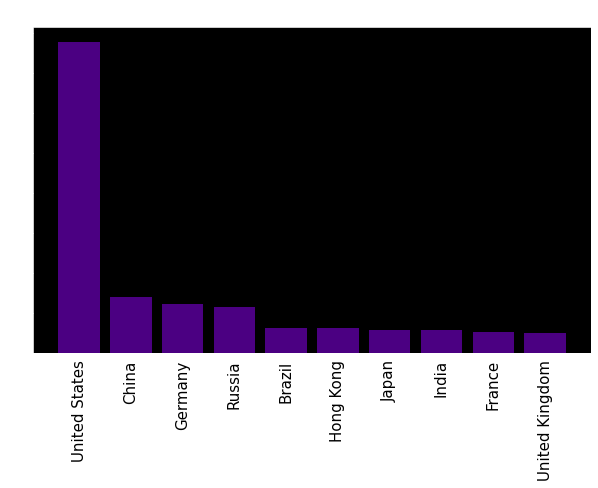

In [ ]:
data=df['country'].value_counts().head(10)

lenth=range(len(data))
plt.figure(figsize=(10,6))
plt.bar(data.index,data.values,color='indigo')
plt.ylabel("", color='black', size=15)
plt.xlabel("", color='black', size=15)
plt.xticks(lenth,data.index, color='black', fontsize=15, rotation=90)
plt.title("Top 10 countries by number of highst billionaires",fontsize=18)
plt.show()

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.2.2


AttributeError: ignored

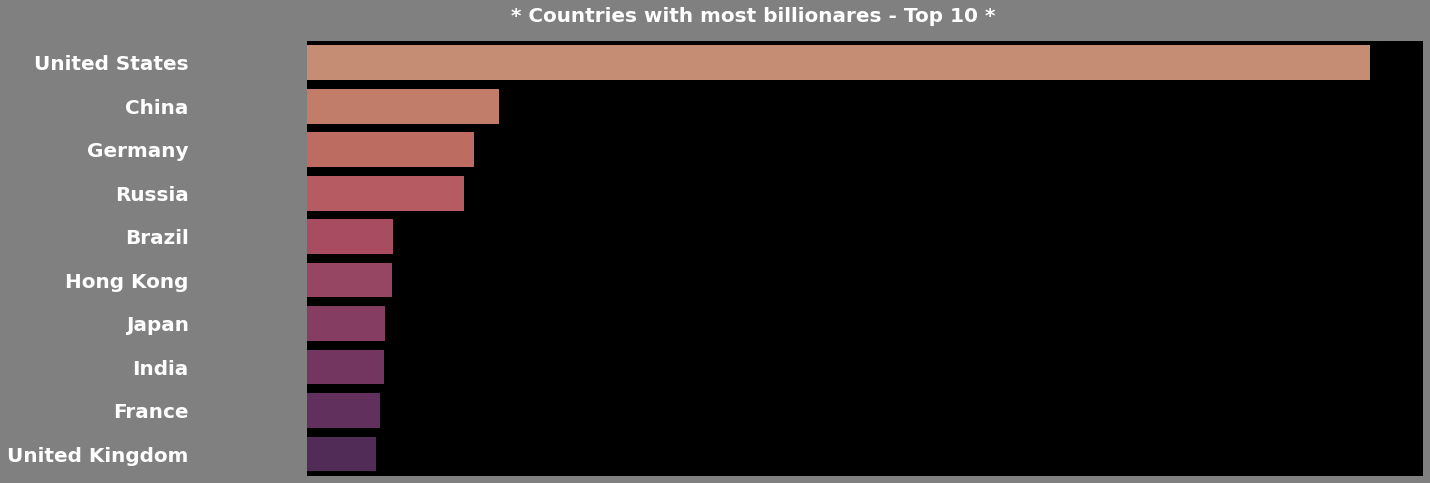

In [ ]:
  #https://www.kaggle.com/code/leventekulcsar/eda-forbes-billionaires

def get_flag(name):

    '''TO GET THE FILE NAME OF THE FLAGS'''

    path = "../input/flagss/{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax):

    """CREATE IMAGE OBJECT AND ADD TO THE FIGURE
    TO MODIFY IMAGE POSITION MODIFY THESE: (0, coord-0.17),  xybox=(-80, -16.)
    coord IS THE POSITION OF THE COUNTRIES. IF WE NEED PICTURE ON X AXIS MOVE
    coord TO FIRST VARIABLE POSITION LIKE THIS: (coord, -0.17),  xybox=(-80, -16.)
    """
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.1)
    im.image.axes = ax

    ab = AnnotationBbox(im, (0, coord-0.17),  xybox=(-80, -16.), frameon=True,
                        xycoords='data',  boxcoords="offset points", pad=0, clip_on=False)

    ax.add_artist(ab);


Countries = df.country.value_counts().head(10).index.tolist()

fig, ax = plt.subplots(figsize=(20, 8), facecolor='gray')

sns.countplot(data=df, y='country', orient='h', order=df.country.value_counts().head(10).index, palette='flare', alpha=0.9)
sns.despine(left=True, bottom=True)

plt.title('* Countries with most billionares - Top 10 *', size=20, weight="bold",x=0.40, family = "DM Sans", y=1.03)
plt.ylabel("", color='white', size=15)
plt.xlabel("", color='white', size=15)
plt.yticks(size=20, weight="bold", x=-0.1, color='white')
plt.xticks([])
plt.tick_params(left=False, color='white')

ax.bar_label(container=ax.containers[0], size=20, weight="bold", padding=10, color="white")
ax.set_facecolor('gray')
ax.spines["left"].set(visible = True)

In [ ]:
#https://www.kaggle.com/code/leventekulcsar/eda-forbes-billionaires

mapdf = px.data.gapminder().query("year==2014")[["country", "iso_alpha"]]

mergedmapdf = pd.merge(left=df, right=mapdf, how="inner", left_on='country', right_on='country' )

mergedmapdf = mergedmapdf.groupby(by=["country", "iso_alpha"]).count()["name"].reset_index()

fig = px.choropleth(mergedmapdf
                    ,locations="iso_alpha"
                    ,color="name"
                    ,hover_name="country"
                    ,color_continuous_scale=px.colors.sequential.Plasma
                    ,hover_data=dict(iso_alpha=False)
                    ,labels={'name':'# of Billionaires'}
                   )

fig.update_layout(title = '# of Billionaires by Countries',title_x=0.5)

fig.update_geos(projection_type="natural earth")

fig['layout']['title']['font'] = dict(size=24)

fig.show()

In [ ]:
#What industries/sectors are most successful?

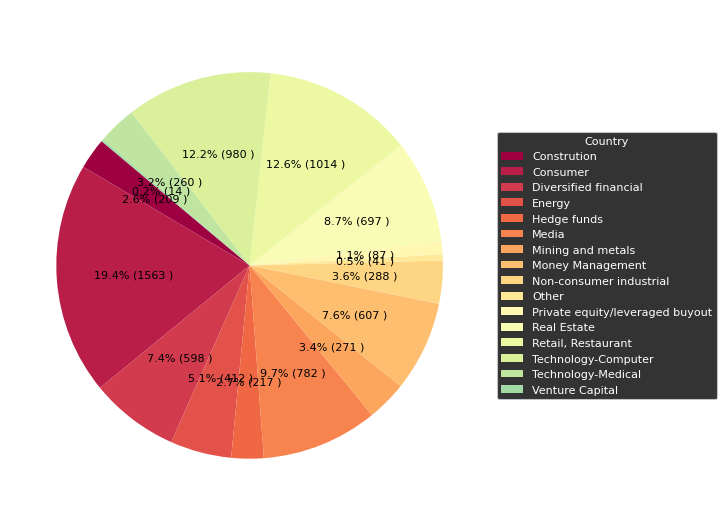

In [ ]:
#https://www.kaggle.com/code/ramjasmaurya/billionaires
vals="wealthworth_inbillions"
df2 = df.groupby('industry')['wealthworth_inbillions'].sum().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df2['counts']
categories = df2['industry']
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="black"),startangle=140,colors=colors[:len(vals)])

# Decoration
ax.legend(wedges, categories, title="Country", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=0)
ax.set_title("Billionaries money as per their sector: Pie Chart")
plt.show()

In [ ]:
df.head()

,name,rank,year,company_founded,company_name,company_relationship,sector,company_type,age,gender,country,region,wealth_type,wealthworth_inbillions,wealth_how_category,industry,wealth_how_inherited
0,Bill Gates,1,1996,1975.0,Microsoft,founder,software,new,40.0,male,United States,North America,founder non-finance,18.5,New Sectors,Technology-Computer,not inherited
1,Bill Gates,1,2001,1975.0,Microsoft,founder,software,new,45.0,male,United States,North America,founder non-finance,58.7,New Sectors,Technology-Computer,not inherited
2,Bill Gates,1,2014,1975.0,Microsoft,founder,software,new,58.0,male,United States,North America,founder non-finance,76.0,New Sectors,Technology-Computer,not inherited
3,Warren Buffett,2,1996,1962.0,Berkshire Hathaway,founder,finance,new,65.0,male,United States,North America,founder non-finance,15.0,Traded Sectors,Consumer,not inherited
4,Warren Buffett,2,2001,1962.0,Berkshire Hathaway,founder,finance,new,70.0,male,United States,North America,founder non-finance,32.3,Traded Sectors,Consumer,not inherited


What are the main industries with the highest number of women billionaires?

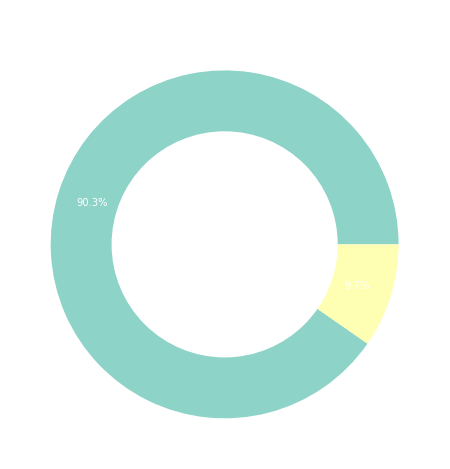

In [ ]:
data=df['gender'].value_counts()
labl=["Male","Female"]
d=[data[0],data[1]]

plt.figure(figsize=(8,8))
plt.pie(d,autopct='%1.1f%%',labels=labl,pctdistance=0.80)

centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title("Billionaires by Sex",fontsize=18)
plt.show()

In [ ]:
df2 = px.df()
fig = px.scatter(df2, x='industry',y='wealthworth_inbillions',size = 'wealthworth_inbillions',color = 'gender', hover_data=['wealthworth_inbillions'])
fig.show()

AttributeError: ignored

In [ ]:
df.head()

,name,rank,year,company_founded,company_name,company_relationship,sector,company_type,age,gender,country,region,wealth_type,wealthworth_inbillions,wealth_how_category,industry,wealth_how_inherited
0,Bill Gates,1,1996,1975.0,Microsoft,founder,software,new,40.0,male,United States,North America,founder non-finance,18.5,New Sectors,Technology-Computer,not inherited
1,Bill Gates,1,2001,1975.0,Microsoft,founder,software,new,45.0,male,United States,North America,founder non-finance,58.7,New Sectors,Technology-Computer,not inherited
2,Bill Gates,1,2014,1975.0,Microsoft,founder,software,new,58.0,male,United States,North America,founder non-finance,76.0,New Sectors,Technology-Computer,not inherited
3,Warren Buffett,2,1996,1962.0,Berkshire Hathaway,founder,finance,new,65.0,male,United States,North America,founder non-finance,15.0,Traded Sectors,Consumer,not inherited
4,Warren Buffett,2,2001,1962.0,Berkshire Hathaway,founder,finance,new,70.0,male,United States,North America,founder non-finance,32.3,Traded Sectors,Consumer,not inherited


What age range represents the highest and lowest number of billionaires?

In [ ]:
df['age_group'] = pd.cut(df['age'], bins = [12, 30, 50, 70, 100], include_lowest = True, labels = ['18-30', '30-50', '50-70','70+'])

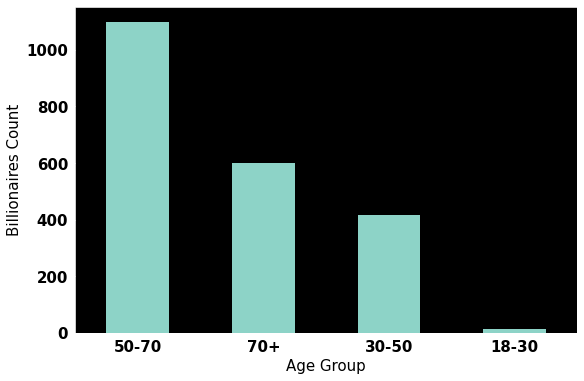

In [ ]:
df['age_group'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("Age Group", fontsize=15, color='black')
plt.ylabel("Billionaires Count", fontsize=15, color='black')
plt.yticks(size=15, weight="bold", x=0, color="black")
plt.xticks(size=15, weight="bold", x=0, color="black", rotation = 0)
plt.show()